# Numerisk laboration II: Bayesiansk inferens för parameterestimering

## Bayesiansk inferens och maskininlärning [TIF385], Chalmers, lp2 2023

Senast uppdaterad: 20-Nov-2023 av Christian Forssén [christian.forssen@chalmers.se]

## Instruktioner

- Se deadline för examination på kurshemsidan.
- Denna numeriska laboration examineras genom individuellt godkänt på obligatoriska uppgifter i Yata, samt genom godkänd gruppredovisning av lösning och resultat för övningsledare.
- Steg 1 och 2 examineras i läsvecka 7 med yatauppgifter och muntlig redovisning.
- Steg 3 examineras med Yatauppgift samt uppladdning av efterfrågade figurer via Canvasuppgift (deadline i tentaveckan).
- Laborationen genomförs individuellt men redovisning kan ske med flera studenter åt gången.
- Diskussioner och samarbete mellan studenter är tillåtet, men varje student som deltar i en redovisning måste på egen hand kunna svara på frågor kring lösning och tolkning.

### Resultat och figurer
- Vid gruppredovisningen skall varje student vara beredd att köra sin lösningskod och kunna demonstrera resultat via efterfrågade figurer.
- Alla figurer skall vara tydliga att avläsa, med rubriker på axlar och en beskrivning av kurvor och/eller data.
- Ni skall kunna tolka era resultat och förklara hur dessa genererades.

## Uppgift

Det övergripande målet är att reproducera några resultat från den vetenskapliga artikeln: [*Bayesian parameter estimation for effective field theories*](https://arxiv.org/abs/1511.03618).  

Detta är en lång artikel med en ganska detaljerad guide till användandet av Bayesiansk inferens inom teoretisk fysik och speciellt när man använder så kallade effektiva fältteorier. Vi kommer enbart att fokusera på en liten del inom Sec. II och ni behöver alltså inte läsa artikeln.

I artikeln introduceras en enkel modell, nämligen Taylorutvecklingen av en trigonometrisk funktion, för att simulera egenskaper hos en effektiv fältteori. Detta motsvarar en situation där man har en övergripande fysikalisk förståelse för sin modell, men saknar detaljerad kunskap om modellparametrar. En effektiv teori är en typ av approximation där man försöker beskriva fysik på en viss längd- eller energi-skala med en modell som innehåller de frihetsgrader som är mest relevanta. Man undviker därmed att försöka upplösa komplicerad fysik på kortare längdskalor (eller högre energi) utan sammanfattar dess effekt i så kallade lågenergikonstanter.

I vårt fall representerar funktionen
$$
y(x) = \left(\frac12 + \tan\left(\frac{\pi}{2}x\right)\right)^2
$$
den underliggande teorin som vi enbart vill försöka modellera för små värden på $x$. I detta område kan vi Taylorutveckla
$$
y(x) = 0.25 + 1.57 x + 2.47 x^2 + 1.29 x^3 + \cdots
$$
och inser alltså att en enkel linjär modell är en god approximation. Den linjära modellens parametrar är i just detta fall kända (eftersom vi vet vilken den underliggande funktionen är), men det skulle de alltså inte vara i en verklig tillämpning. Däremot så förväntar vi oss att samtliga modellparametrar är av "naturlig storlek", dvs av storleksordningen 1 (och inte 10, 100, osv). Vi förväntar oss också att de kan vara både positiva och negativa.

Vår effektiva modell är alltså linjär
$$
M(\boldsymbol{\theta};x) = \sum_{i=0}^k \theta_i x^i,
$$
där $\theta_i$ är våra modellparametrar och parameterdimensionen är $N_p = k+1$ där $k$ är graden på polynomet.

Målet är att estimera parametrarna $\theta_i$ för olika modelltrunkeringar $k$ (vilket motsvarar att bestämma $N_p = k+1$ parametrar). Vi skall använda både linjär och Bayesiansk regression och analysera resultaten.

Mer specifikt så utförs uppgiften i tre steg (plus förberedelse) som beskrivs närmare nedan:

* Steg 0: Förberedelse
* **Steg 1: Linjär regression**
* **Steg 2: Bayesiansk inferens**
* **Steg 3: MCMC sampling och a posteriori förutsägelser**

### Lärandemål
- Att själv kunna välja ut och använda relevanta metoder för att utföra en modell- och dataanalys.
- Mer specifikt; 
  - att tillämpa numeriska metoder för att utföra linjär regression och Bayesiansk inferens.
  - att utföra numeriska matrisoperationer för att få resultat (vilket möjliggörs genom att betrakta en linjär modell med analytiska uttryck för de relevanta sannolikhetsfördelningarna).
  - att tillämpa den mer kraftfulla numeriska metoden MCMC sampling på en analys där det också är möjligt att validera de numeriska resultaten.
- Tolka resultat i termer av mängden och precisionen på tillgänglig data, samt a priori kunskaper.
- Skapa och presentera vetenskapligt komponerade figurer och kunna beskriva dessa.

## Steg 0: Förberedelse

Denna del examineras inte, men rekommenderas för att kunna utföra och förstå uppgifterna nedan samt att kunna tolka resultaten. Förhoppningsvis känner ni igen flera delar från övningar, demonstrationer och föreläsningar. 
- Läs de relevanta avsnitten i kurskompendiet. Speciellt linjär regression (kap. 8) samt Bayesiansk linjär regression (kap. 18), men även repetitionen av relevanta koncept i matematisk statistik (kap. 6). 
- Studera speciellt uppvärmningsexemplen från linjär regression i kapitel 8 samt Bayesiansk linjär regression i kapitel 18.
- Gör uppgifterna 8.1 och 8.2. Ni har antagligen kod för detta från räkneövningar och demonstrationer under de första två läsveckorna. Detta exempel går även att lösa med penna och papper.
- Gå igenom avsnitt 18.6 i kurskompendiet och gör de rekommenderade uppgifterna 18.2, 18.3, 18.4.

## Examinerade delar. Förslag på tillvägagångssätt:

### Steg 1 och 2
* Följ de specifika instruktionerna nedan för att ladda ner samma data som användes i artikeln: [D1_c_5.dat](https://arxiv.org/src/1511.03618v3/anc/D1_c_5.dat). 
  - De tre kolumnerna mostvarar den oberoende parametern $x_j$, motsvarande uppmätta respons $d_j$ samt standardavvikelsen på det experimentella felet $\sigma_j$.
  - Vi kommer att utföra en analys där vi *antar* att den experimentella osäkerheten karakteriseras av en enda, fix standardavvikelse som vi kommer att sätta till $\sigma_\epsilon = 0.05$.
* Följ instruktionerna stegvis. Titta på kodexempel i förläsningsanteckningarna för ledtrådar.
* Definiera funktioner för den linjära modellen och för den underliggande funktionen så att det går att rita upp dessa i figurer. Använd ett tätare intervall av punkter i $x$-led för detta, men håll er till intervallet $x \in [0.0, 0.4]$.
* Starta med en modell med ett lågt ordningens polynom och utöka detta när ni är säkra på resultaten.

### Steg 3: MCMC sampling
* Utveckla och testa er samplingsfunktion i Yata innan ni använder den i uppgiften.
* Skapa funktioner för logaritmen av a priori- och trolighetsfördelningarna. Notera att logaritmen av (den onormaliserade) a posteriorifördelningen då är summan av dessa. Ni behöver inte inkludera normaliseringskonstanter som inte beror på de parametrar som ni försöker estimera.
* För att spara ner figurer kan funktionen `savefig` i `matplotlib.pyplot` vara användbar.
* Glöm inte axelrubriker och teckenförklaring ("legend") i figurerna.

### modulimport

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

### Nedladdning av data

Det bifogade materialet till atikeln arXiv:1511.03618 inkluderar den datafil som vi skall använda. Vi kan använda `pandas` för att läsa denna från en url.

In [15]:
# Let's read the data using pandas.
url = "https://arxiv.org/src/1511.03618v3/anc/D1_c_5.dat"
#url = "D1_c_5.dat.txt"
names = ['x', 'd', 'sigma']
# Note that the data file uses one or more tabs as separators. So the regex '\t+' is needed
# and this calls for engine='python'
# Comment lines starting with '#' should be ignored
pd_D = pd.read_csv(url, names=names, sep='\t+', engine='python', comment='#')
print(f'Read data from {url} into a pandas data frame with shape: {pd_D.shape}')
display(pd_D)

Read data from https://arxiv.org/src/1511.03618v3/anc/D1_c_5.dat into a pandas data frame with shape: (10, 3)


,x,d,sigma
0,0.03183,0.31694,0.015850
1,0.06366,0.33844,0.016920
2,0.09549,0.42142,0.021070
3,0.12732,0.57709,0.028850
4,0.15915,0.56218,0.028110
5,0.19099,0.68851,0.034430
6,0.22282,0.73625,0.036810
7,0.25465,0.87270,0.043640
8,0.28648,1.00150,0.050075
9,0.31831,1.06840,0.053420


In [16]:
# Taylorutveckling av den underliggande funktionen
# g(x) = 0.25 + 1.57x + 2.47x**2 + 1.29x**3
theta_true = np.array([0.25, 1.5707963, 2.4674011, 1.2919282, 4.0587121,
                       1.275082, 5.67486677])

## Steg 1: Linjär regression

(a) Examineras i Yata.

   Utför linjär regression på denna data för modeller med $k \in \{ 0, 1, 2, 3, 4, 5\}$. 

In [17]:
def generate_design_matrix(xdata, poldeg):

    N_p = poldeg + 1
    N_d = len(xdata)
    X = np.zeros([N_d, N_p])
    for i, x in enumerate(xdata):
        for j in range(N_p):
            X[i,j] = x**j
    return X
        
def polyfit(xdata, ydata, poldeg):

    X = generate_design_matrix(xdata, poldeg)
    
    XTX = np.matmul(X.T, X)
    ydata = np.array(ydata).reshape(-1,1)
    XTY = np.matmul(X.T, ydata)
    XTXinv = np.linalg.inv(XTX)

    theta = np.matmul(XTXinv, XTY) # Hitta theta som ger minsta fel
    return theta

[[0.658343]]
[[0.18285983]
 [2.71596033]]
[[0.24577724]
 [1.7276393 ]
 [2.8226453 ]]
[[0.24519042]
 [1.74399066]
 [2.71126595]
 [0.21206631]]
[[  0.24068338]
 [  1.92552307]
 [  0.62446143]
 [  9.17047094]
 [-12.79260385]]
[[ 5.73270055e-01]
 [-1.52989340e+01]
 [ 2.84692911e+02]
 [-1.98603053e+03]
 [ 6.21757778e+03]
 [-7.11757626e+03]]


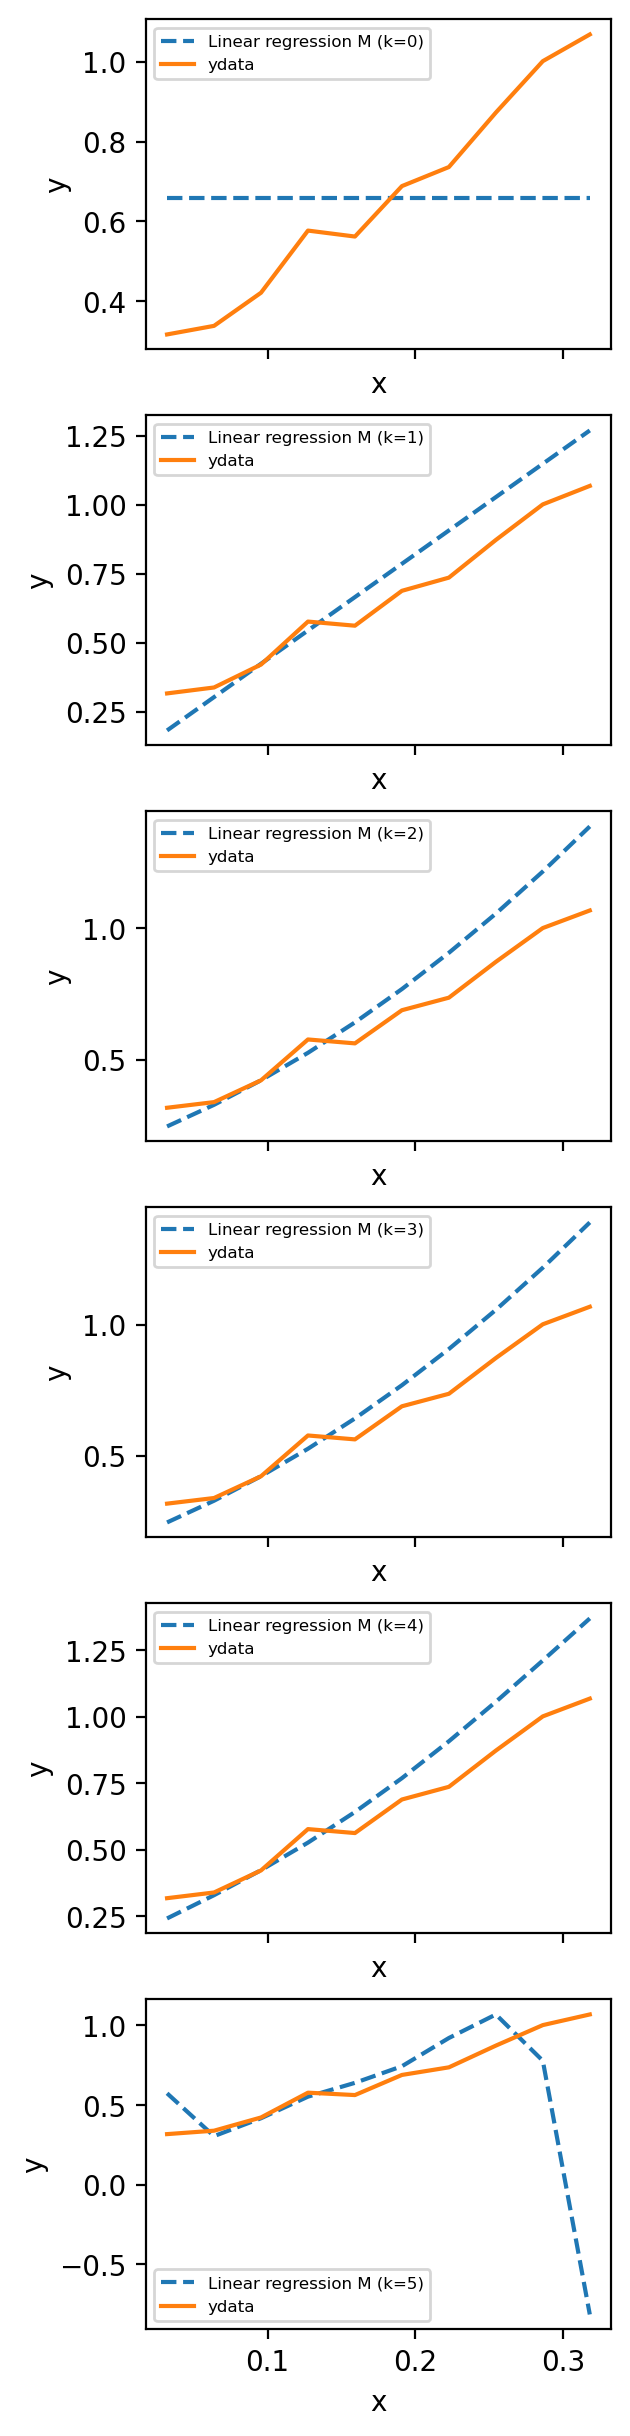

In [18]:

k = [0,1,2,3,4,5]

xdata = [x for x in pd_D["x"]]
ydata = [x for x in pd_D["d"]]
x = np.linspace(0, 0.4, 10)

fig, ax = plt.subplots(nrows=len(k), figsize=(3, 15), dpi=200, sharex=True)

OLR_mean = []
for i in k:
    ols_theta = polyfit(xdata, ydata, i)
    print(ols_theta)
    OLR_mean.append(ols_theta)
    X = generate_design_matrix(x, i)
    # print(X)
    M = np.matmul(X, ols_theta)
    
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")

    ax[i].plot(xdata, M, linestyle="dashed", label=f'Linear regression M (k={i})')
    ax[i].plot(xdata, ydata, label=f'ydata')
    ax[i].legend(loc="best", fontsize="6")

(b) Figur 1:

   Jämför data, exakt funktion samt de olika linjära modeller som anpassades i deluppgift 1(a).
   - Vad händer med modellen som har sex paramterar?

## Steg 2: Bayesiansk inferens

- Antag en (oberoende) normal a priori fördelning i alla parameterriktningar med medelvärdet $\mu_\theta=0$ samt standardavvikelse $\sigma_\theta=5.0$.
- Vidare antar vi oberoende och identiskt normalfördelade experimentella fel med medelvärdet $\mu_\epsilon=0$ samt standardavvikelse $\sigma_\epsilon = 0.05$.

(a)  Tabell 1:

   Gör bayesiansk inferens enligt ovan antaganden för $k \in \{0, 1, 2, 3, 4, 5\}$. Redovisa medelvärden samt standardavvikelse för de marginaliserade parameterfördelningarna för samtliga sex inferensproblem. 
   - Jämför med koefficienterna för Taylorutvecklingen av den underliggande funktionen. 
   - Jämför med resultaten från linjär regression ovan och tolka skillnaden.

In [26]:
from tabulate import tabulate

res_var_sq = 0.05**2
res_mean = 0

prior_var_sq = 5.0**2
prior_mean = 0

k = [0,1,2,3,4,5]

xdata = np.array([x for x in pd_D["x"]])
ydata = np.array([x for x in pd_D["d"]])

def generate_design_matrix(xdata, poldeg):
    N_p = poldeg + 1
    N_d = len(xdata)
    X = np.zeros([N_d, N_p])
    for i, x in enumerate(xdata):
        for j in range(N_p):
            X[i,j] = x**j
    return X

def polyfit(xdata, ydata, poldeg):

    X = generate_design_matrix(xdata, poldeg)
    
    XTX = np.matmul(X.T, X)
    ydata = np.array(ydata).reshape(-1,1)
    XTY = np.matmul(X.T, ydata)
    XTXinv = np.linalg.inv(XTX)

    theta = np.matmul(XTXinv, XTY) # Hitta theta som ger minsta fel
    return theta        
def bay_lin_reg(xdata, ydata, poldeg, res_var_sq=0.05**2, res_mean=0, prior_var_sq=5.0**2, prior_mean=0):
    X = generate_design_matrix(xdata, poldeg)
    theta_star = polyfit(xdata, ydata, poldeg)
    likelihood_cov_inv = (X.T @ X)/res_var_sq
    post_cov_inv = likelihood_cov_inv + np.eye(X.shape[1])/prior_var_sq
    theta_tilde = np.linalg.inv(post_cov_inv)@likelihood_cov_inv@theta_star
    
    posterior_cov_matrix = np.linalg.inv(post_cov_inv) 
    posterior_std = np.array([])
    
    likelihood_cov_matrix = np.linalg.inv(likelihood_cov_inv)
    likelihood_std = np.array([]) 
    
    for i in range(poldeg+1):
        posterior_std = np.vstack(np.append(posterior_std, np.sqrt(posterior_cov_matrix[i,i])))
        likelihood_std = np.vstack(np.append(likelihood_std, np.sqrt(likelihood_cov_matrix[i,i])))
    return theta_tilde, posterior_std, likelihood_std

def taylorkoeff(poldeg):
    output_array = np.array([])
    for i in range(poldeg + 1):
        output_array = np.vstack(np.append(output_array, theta_true[i]))
    return output_array
Taylor_expansion = []
OLR_mean = []
BLR_mean = [] 
BLR_std = []
LH_std = []

for i in k:
    theta_tilde, posterior_std, likelihood_std = bay_lin_reg(xdata, ydata, i, res_var_sq=0.05**2, res_mean=0, prior_var_sq=5.0**2, prior_mean=0)
    BLR_mean.append(theta_tilde)
    BLR_std.append(posterior_std)
    LH_std.append(likelihood_std)
    
    OLR_mean.append(polyfit(xdata, ydata, i))
    Taylor_expansion.append(taylorkoeff(i))
    
# print(OLR_mean)
tab_dict = {
    "Degree": k,
    "": [],
    "Taylor expansion": Taylor_expansion,
    "OLR mean": OLR_mean,
    "BLR mean": BLR_mean,
    "BLR std": BLR_std
} 
print(tabulate(tab_dict, headers="keys", tablefmt="grid"))

print('Enligt tabellen kan vi se att BLR inte överanpassar datan lika mycket som OLR')



+----------+----+--------------------+---------------------+----------------+----------------+
|   Degree |    | Taylor expansion   | OLR mean            | BLR mean       | BLR std        |
+==========+====+====================+=====================+================+================+
|        0 |    | [[0.25]]           | [[0.658343]]        | [[0.65833642]] | [[0.01581131]] |
+----------+----+--------------------+---------------------+----------------+----------------+
|        1 |    | [[0.25     ]       | [[0.18285983]       | [[0.1834194 ]  | [[0.03413916]  |
|          |    |  [1.5707963]]      |  [2.71596033]]      |  [2.71275354]] |  [0.17282961]] |
+----------+----+--------------------+---------------------+----------------+----------------+
|        2 |    | [[0.25     ]       | [[0.24577724]       | [[0.23857652]  | [[0.05523738]  |
|          |    |  [1.5707963]       |  [1.7276393 ]       |  [1.84448647]  |  [0.70508547]  |
|          |    |  [2.4674011]]      |  [2.8226453

(b) Figur 2:

   Fokusera på inferensen med ett tredjegradspolynom ($k=3$). Redovisa i fyra paneler de marginaliserade fördelningarna för det fyra parametrarna. I varje panel skall ni jämföra a priori- och a posteriori-fördelningarna samt även visa trolighetsfunktionen som en funktion av respektive parameter. 
   - Tolka dessa resultat.

[[ 0.0970367 ]
 [ 2.28500156]
 [14.80692099]
 [27.89426807]]


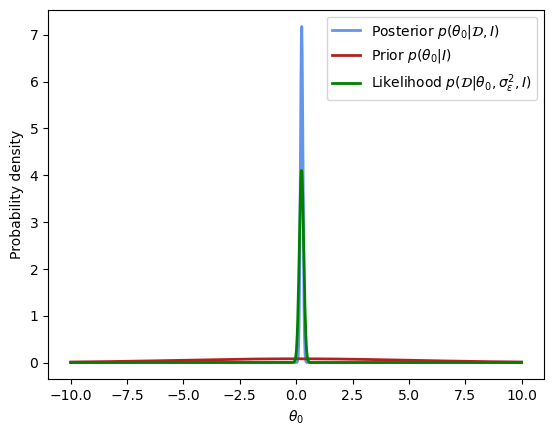

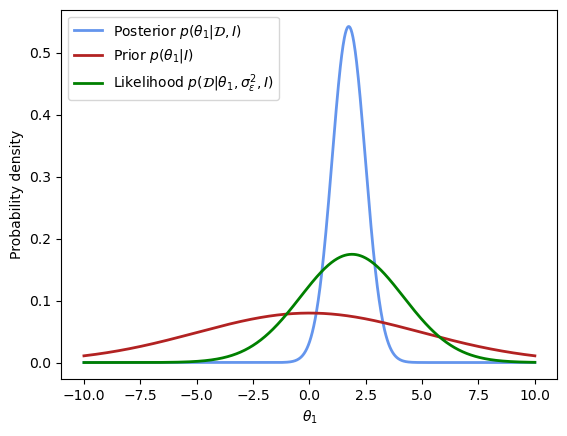

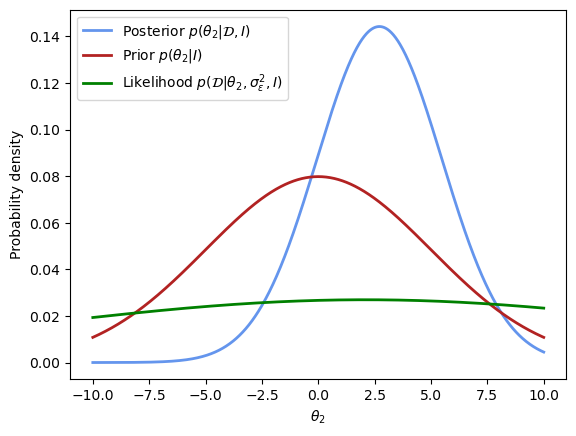

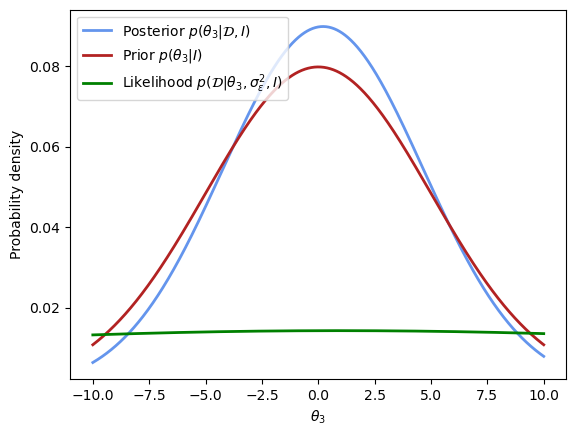

In [20]:
from scipy.stats import multivariate_normal

k = 3

mu = OLR_mean[k]
Sigma = BLR_std[k]

Sigma_likelihood = LH_std[k]
print(Sigma_likelihood)
mu_likelihood = BLR_mean[k]

for i in range(k+1):
    theta_i = np.linspace(-10, 10, 1000)
    
    posterior_i = multivariate_normal(mu[i], Sigma[i]**2)
    prior_i = multivariate_normal(prior_mean, prior_var_sq)
    likelihood_i = multivariate_normal(mu_likelihood[i], Sigma_likelihood[i]**2)
    plt.plot(theta_i, posterior_i.pdf(theta_i), c='cornflowerblue', lw=2, label=rf'Posterior $p(\theta_{i}' + r'|\mathcal{D},I)$')
    plt.plot(theta_i, prior_i.pdf(theta_i), c='firebrick', lw=2, label=rf'Prior $p(\theta_{i}|I)$')
    plt.plot(theta_i, likelihood_i.pdf(theta_i), c='green', lw=2, label=r'Likelihood $p(\mathcal{D}|'+rf'\theta_{i}, \sigma_\epsilon^2,I)$')
    
    plt.xlabel(rf'$\theta_{i}$')
    plt.legend(loc='best')
    plt.ylabel('Probability density')
    plt.show()

## Steg 3: MCMC sampling och a posteriori förutsägelser

- Utveckla en MCMC-sampler för att genomföra den Bayesianska inferensen helt numeriskt. 
- Definiera funktioner för logaritmen av a priori fördelningen samt för logaritmen av trolighetsfunktionen som tar en parameteruppsättning som argument. Ni behöver inte inkludera normaliseringskonstanter som inte beror på de parametrar som ni försöker estimera. 
- Definiera slutligen en funktion som beräknar logaritmen av (den onormaliserade) a posteriorifördelningen,. Denna blir helt enkelt summan av ovanstående log-PDF:er.

(a) Examineras i Yata

Skapa en MCMC-sampler som bygger på Metropolisalgoritmen och som använder en normalfördelning för att föreslå nya positioner i ett $N_p$-dimensionellt rum.

(b) Figur 3 (laddas upp i Canvasuppgift):

Utför en MCMC sampling av a posteriorifördelningen för den kvadratiska modellen (med tre parametrar). Visa följande marginalfördelningar, gärna i en så kallad "corner plot":

Bivariata
-  $p(\theta_0,\theta_1 \vert \mathcal{D}, I)$
-  $p(\theta_0,\theta_2 \vert \mathcal{D}, I)$
-  $p(\theta_1,\theta_2 \vert \mathcal{D}, I)$

Univariata
-  $p(\theta_0 \vert \mathcal{D}, I)$
-  $p(\theta_1 \vert \mathcal{D}, I)$
-  $p(\theta_2 \vert \mathcal{D}, I)$

Undersök hur kvaliten på dessa samplade fördelningar beror på antalet iterationer samt på bredden på normalfördelningen som används för att föreslå nya positioner. Jämför på egend hand (behöver ej redovisas):
- Hur väl jämför medelvärden och varianser med den analytiska lösningen?

(c) Figur 4 (laddas upp i Canvasuppgift):

Välj cirka 100 stickprov ur den samplade fördelningen och gör en förutsägelse av funktionens utseende i intervallet $x \in [0, 0.4]$. Jämför med data samt på den underliggande funktionen. Försök dra slutsatser kring följande (måste ej redovisas):
- Är det bäst att välja stickprov som kommer efter varandra i samplingen, eller är det bättre att sprida ut dem?
- Var är osäkerheten i förutsägelserna som störst?

In [21]:
import numpy as np
from scipy.stats import multivariate_normal

def sampler(log_posterior_func, Np, no_of_samples=4, start_position=None, 
            proposal_width=1.):
    '''
    Metropolis sampler function for a multi-dimensional pdf.
    
    Args:
        log_posterior_func: Function 
            Function that takes `Np` positional arguments and returns 
            the logarithm of the (possibly unnormalized) pdf.
        Np: int
            Number of parameter dimensions
        no_of_samples: int 
            Number of samples that will be returned (excluding the start position). 
        start_position: array_like or None
            Start position. 
        proposal_width: float 
            Width of symmetric Gaussian proposal distribution.
        
    Returns:
        ndarray (no_of_samples+1,Np)
            MCMC samples
    '''
    # starting parameter position
    if start_position==None:
        current_position = np.zeros(Np)
    else:
        assert len(start_position)==Np, "start_position is not correct length"
        current_position = np.asarray(start_position)
    samples = [current_position]
    
    # fixed covariance matrix
    cov = np.eye(Np)*proposal_width**2
    # Sampling loop
    for i in range(no_of_samples):
        # suggest new position
        proposed_position = np.random.multivariate_normal(current_position, cov) # dra en random sample från normalfördelningen
        
        # Compute log posteriors of current and proposed position       
        current_log_post = log_posterior_func(current_position)
        proposed_log_post = log_posterior_func(proposed_position)

        # Acceptance probability
        # Note that this part will be modified in the Metropolis-Hastings algorithm 
        # for which we also consider asymmetric proposal distributions
        accept_prob = min(0, proposed_log_post - current_log_post) # håller det logaritmerat för att inte få overflow. OBS np.exp(0) = 1

        # Accept proposal?
        accept = np.random.uniform(0,1) < np.exp(accept_prob) # slumpar uniformt från 0 till 1.0 och ser ifall vi får accept_prob

                
        # Possibly update position
        if accept:
            current_position = proposed_position

        # Extend the samples array vertically for each iteration
        # np.vstack() can be useful
        samples.append(current_position)
        
    return np.array(samples)

In [22]:
N = 1000000
Np = 3
prior_mean = 0
prior_std = 5
error_std = 0.05

# enl. def. har likelihood funktionens pdf det riktiga theta värdet som mean och error_std som std.avv. 
# def log_posterior_function(X):
#     prior_log = (-1/(2*prior_std**2))*((X - prior_mean*np.ones(X.shape)).T@(X - prior_mean*np.ones(X.shape)))
#     likelihood_log = (-1/(2*error_std**2))*((X - theta_true[0:len(X)]).T@(X - theta_true[0:len(X)]))
#     posterior_log = prior_log + likelihood_log
#     return posterior_log

def log_posterior_function2(theta):
    X = generate_design_matrix(xdata, len(theta)-1)
    likelihood_cov_inv = (X.T@X)/error_std**2
    prior_log = (-1/2)*theta.T@theta/prior_std**2
    likelihood_log = (-1/2)*(theta_true[0:len(theta)] - theta).T @ likelihood_cov_inv @ (theta_true[0:len(theta)] - theta)
    posterior_log = prior_log + likelihood_log
    return posterior_log

# def log_posterior_function3(theta):
#     X = generate_design_matrix(xdata, len(theta)-1)
#     likelihood_cov_inv = (X.T@X)/error_std**2
#     prior_log = (-1/2)*theta_true[0:len(theta)].T@theta_true[0:len(theta)]/prior_std**2
#     likelihood_log = (-1/2)*(theta_true[0:len(theta)] - theta).T @ likelihood_cov_inv @ (theta_true[0:len(theta)] - theta)
#     posterior_log = prior_log + likelihood_log
#     return posterior_log


samples = sampler(log_posterior_function2, Np, no_of_samples=N, start_position=None, proposal_width=1.)
print(theta_true[0:Np])
print(samples)

[0.25      1.5707963 2.4674011]
[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.80644588 0.5962356  0.25391121]
 ...
 [0.30090164 1.24965047 3.09332407]
 [0.30090164 1.24965047 3.09332407]
 [0.30090164 1.24965047 3.09332407]]


(-5.0, 10.0)

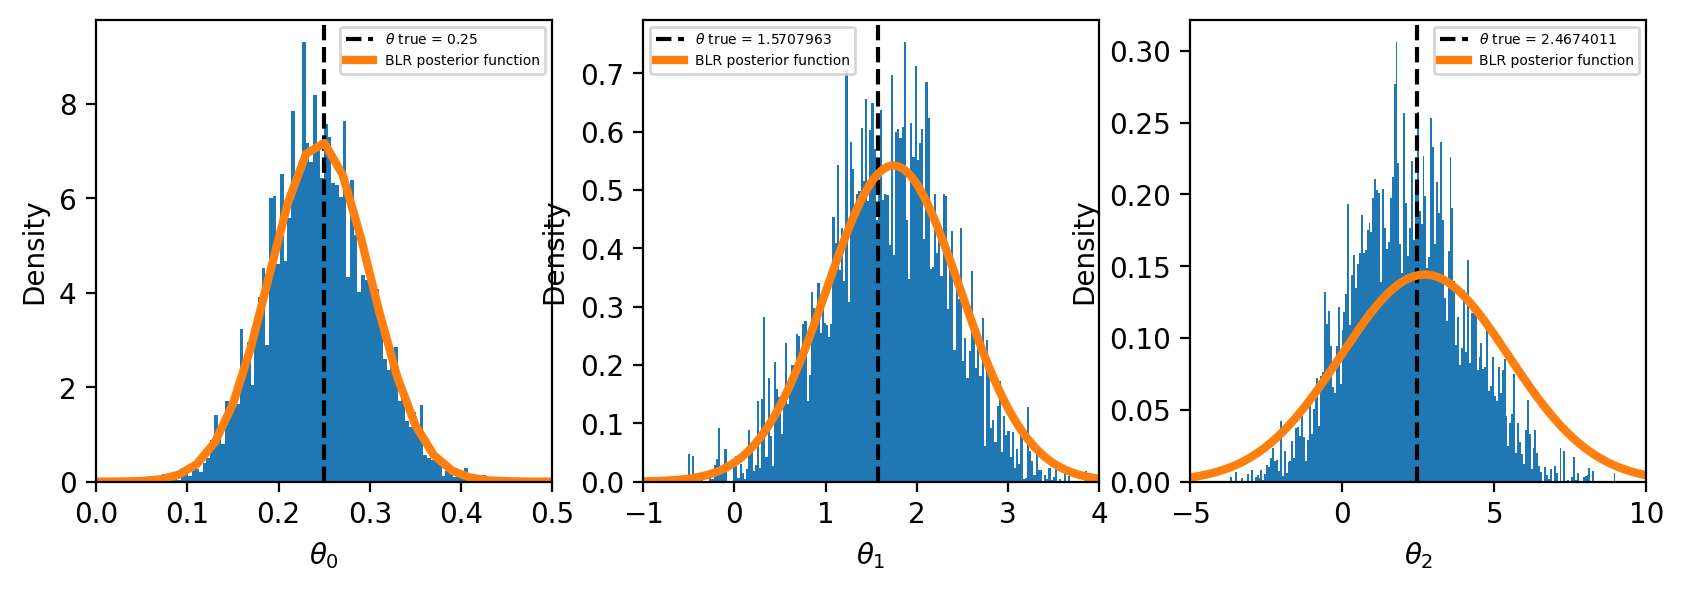

In [23]:
fig, ax = plt.subplots(ncols=Np, figsize=(10,3), dpi=200)
for i in range(Np):
    ax[i].set_xlabel(rf"$\theta_{i}$")
    ax[i].set_ylabel("Density")
    ax[i].hist([x[i] for x in samples], bins=200, density=True)
    ax[i].axvline(theta_true[i], color="black", linestyle="dashed", label=rf"$\theta$ true = {theta_true[i]}")
    ax[i].legend(loc="best", fontsize="6")
    x_vals = np.linspace(-10, 10, 1000)
    BLR_posterior = multivariate_normal(mu[i], Sigma[i]**2)
    ax[i].plot(x_vals, BLR_posterior.pdf(x_vals), linewidth=3, label="BLR posterior function")
    ax[i].legend(fontsize=5, loc="best")

ax[0].set_xlim(0,0.5)
ax[1].set_xlim(-1,4)
ax[2].set_xlim(-5,10)


In [24]:
import corner

sampleT0T1 = np.array([x[0:2] for x in samples])
sampleT1T2 = np.array([x[1:3] for x in samples])
sampleT0T2 = np.array([[x[0], x[2]] for x in samples])

mu_theta = 0
sigma_theta = 5.0
mu_epsilon = 0
sigma_epsilon = 0.05

figure = corner.corner(samples, bins=20, labels=[fr'$\theta_{i}$' for i in range(3)], show_titles=True)



# figure = corner.corner(sampleT0T1, labels=[r"$\theta_{0}$", r"$\theta_{1}$"])
# figure = corner.corner(sampleT1T2, labels=[r"$\theta_{1}$", r"$\theta_{2}$"])
# figure = corner.corner(sampleT0T2, labels=[r"$\theta_{0}$", r"$\theta_{2}$"])

ModuleNotFoundError: No module named 'corner'

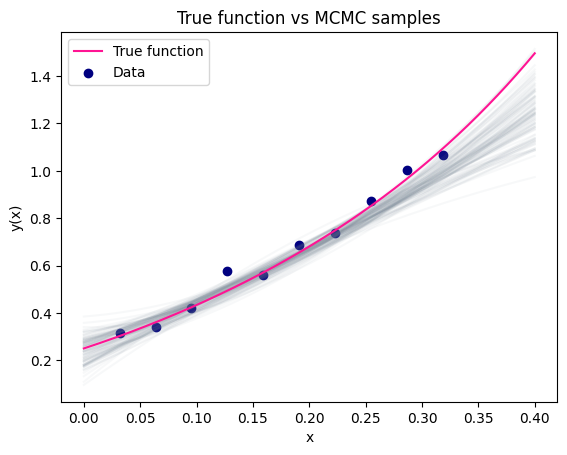

In [ ]:
X = generate_design_matrix(xdata, Np-1)
random_number_array = np.random.choice(N, 100)

xvalues = np.linspace(0, 0.4, 1000)

xdata = [x for x in pd_D["x"]]
ydata = [x for x in pd_D["d"]]

design_matrix_MCMC = generate_design_matrix(xvalues, Np-1)
design_matrix_true = generate_design_matrix(xvalues, len(theta_true)-1)

theta_MCMC = np.array([samples[x] for x in random_number_array])

xdata = [x for x in pd_D["x"]]
ydata = [x for x in pd_D["d"]]

for i in range(len(theta_MCMC)):
    plt.plot(xvalues, design_matrix_MCMC@theta_MCMC[i], alpha=0.05, color="slategrey")
plt.plot(xvalues, design_matrix_true@theta_true, label="True function", color="deeppink")
plt.scatter(xdata, ydata, label="Data", color="navy")
plt.title("True function vs MCMC samples")
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()
